<a href="https://colab.research.google.com/github/Abhik4004/SafeCorrido-2.0-/blob/main/DynamicGraphPlottingeRefinedOne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import folium
from sklearn.cluster import DBSCAN
from google.colab import files

data = []
with open('/content/tracking_data.txt', 'r') as file:
    for line in file:
        if line.startswith('Type: GPS'):
            line = line.strip().split(', ')
            gps = {}
            for item in line:
                key, value = item.split(': ')
                if key.strip() in ['Latitude', 'Longitude']:
                    gps[key.strip()] = float(value.strip())
                elif key.strip() == 'Timestamp':
                    gps[key.strip()] = value.strip()
            data.append(gps)

df = pd.DataFrame(data)

dbscan = DBSCAN(eps=0.0001, min_samples=2).fit(df[['Latitude', 'Longitude']])
df['Cluster'] = dbscan.labels_

map_plot = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=15)

for index, row in df.iterrows():
    if row['Cluster'] == -1:
        folium.Marker([row['Latitude'], row['Longitude']], icon=folium.Icon(color='red')).add_to(map_plot)
    else:
        folium.Marker([row['Latitude'], row['Longitude']], icon=folium.Icon(color='blue')).add_to(map_plot)

map_plot.save("trail_map.html")
files.download("trail_map.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

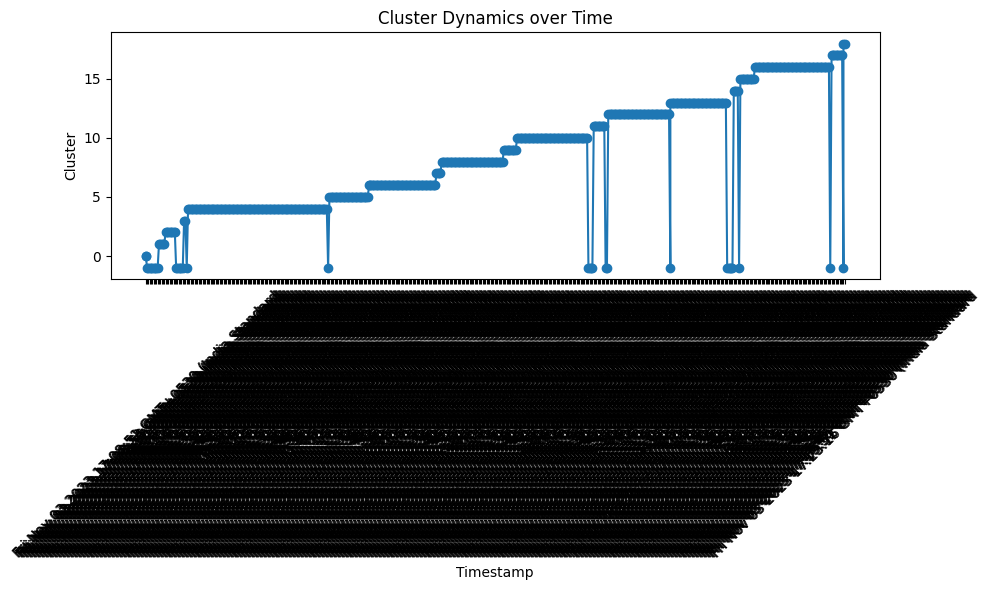

In [ ]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from google.colab import files

# Read GPS data from the TXT file into a DataFrame
data = []
with open('/content/tracking_data.txt', 'r') as file:
    for line in file:
        if line.startswith('Type: GPS'):
            line = line.strip().split(', ')
            gps = {}
            for item in line:
                key, value = item.split(': ')
                if key.strip() in ['Latitude', 'Longitude']:
                    gps[key.strip()] = float(value.strip())
                elif key.strip() == 'Timestamp':
                    gps[key.strip()] = value.strip()
            data.append(gps)

# Create a DataFrame from the GPS data
df = pd.DataFrame(data)

# Remove the timezone information
df['Timestamp'] = df['Timestamp'].str.split(' ').str[:-1].str.join(' ')

# # Convert the Timestamp column to datetime
# df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%a %b %d %Y %H:%M:%S')

# Implement DBSCAN for clustering
dbscan = DBSCAN(eps=0.0001, min_samples=2).fit(df[['Latitude', 'Longitude']])
df['Cluster'] = dbscan.labels_

# Create a Folium map
map_plot = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=15)

for index, row in df.iterrows():
    if row['Cluster'] == -1:
        folium.Marker([row['Latitude'], row['Longitude']], icon=folium.Icon(color='red')).add_to(map_plot)
    else:
        folium.Marker([row['Latitude'], row['Longitude']], icon=folium.Icon(color='blue')).add_to(map_plot)

# Save the map as an HTML file and download
map_plot.save("trail_map.html")
files.download("trail_map.html")

# Generate a graph
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Cluster'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Cluster')
plt.title('Cluster Dynamics over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

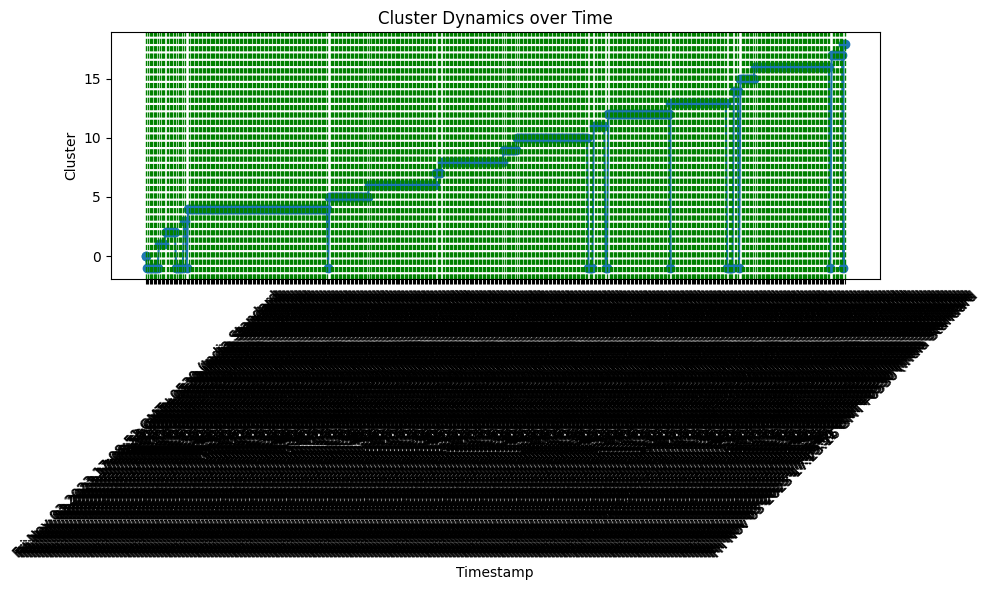

In [ ]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from google.colab import files

# Read GPS data from the TXT file into a DataFrame
data = []
with open('/content/tracking_data.txt', 'r') as file:
    for line in file:
        if line.startswith('Type: GPS'):
            line = line.strip().split(', ')
            gps = {}
            for item in line:
                key, value = item.split(': ')
                if key.strip() in ['Latitude', 'Longitude']:
                    gps[key.strip()] = float(value.strip())
                elif key.strip() == 'Timestamp':
                    gps[key.strip()] = value.strip()
            data.append(gps)

# Create a DataFrame from the GPS data
df = pd.DataFrame(data)

# Remove the timezone information
df['Timestamp'] = df['Timestamp'].str.split(' ').str[:-1].str.join(' ')

# Implement DBSCAN for clustering
dbscan = DBSCAN(eps=0.0001, min_samples=2).fit(df[['Latitude', 'Longitude']])
df['Cluster'] = dbscan.labels_

# Identify pauses (where Cluster value remains the same for consecutive points)
pauses = df[df['Cluster'].diff().eq(0)]

# Create a Folium map
map_plot = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=15)

for index, row in df.iterrows():
    if row['Cluster'] == -1:
        folium.Marker([row['Latitude'], row['Longitude']], icon=folium.Icon(color='red')).add_to(map_plot)
    else:
        folium.Marker([row['Latitude'], row['Longitude']], icon=folium.Icon(color='blue')).add_to(map_plot)

# Mark pauses on the map
for _, pause_row in pauses.iterrows():
    folium.Marker([pause_row['Latitude'], pause_row['Longitude']], icon=folium.Icon(color='green')).add_to(map_plot)

# Save the map as an HTML file and download
map_plot.save("trail_map_with_pauses.html")
files.download("trail_map_with_pauses.html")

# Generate a graph
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Cluster'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Cluster')
plt.title('Cluster Dynamics over Time')
plt.xticks(rotation=45)

# Mark pauses on the graph
for _, pause_row in pauses.iterrows():
    plt.axvline(x=pause_row['Timestamp'], color='green', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

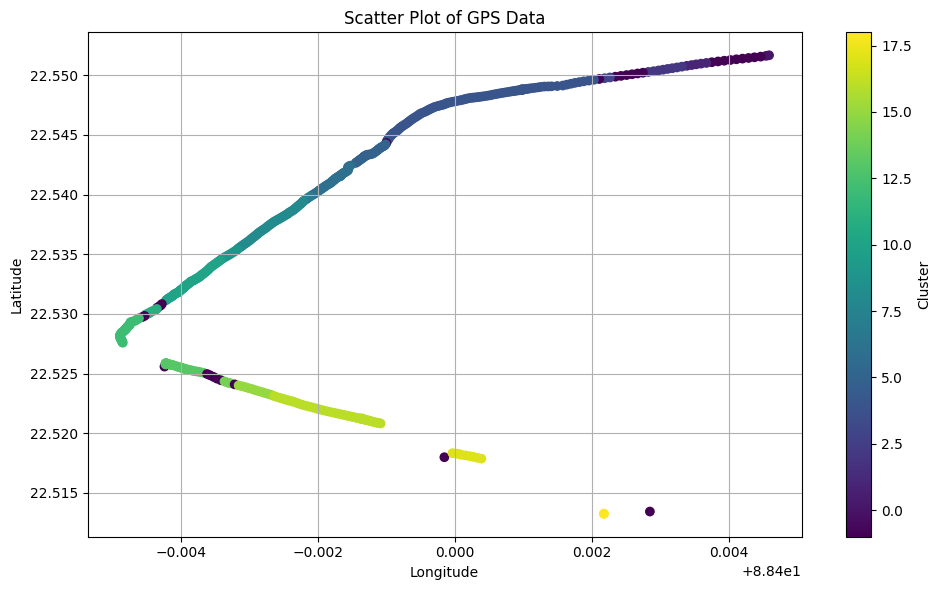

In [ ]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from google.colab import files

# Read GPS data from the TXT file into a DataFrame
data = []
with open('/content/tracking_data.txt', 'r') as file:
    for line in file:
        if line.startswith('Type: GPS'):
            line = line.strip().split(', ')
            gps = {}
            for item in line:
                key, value = item.split(': ')
                if key.strip() in ['Latitude', 'Longitude']:
                    gps[key.strip()] = float(value.strip())
                elif key.strip() == 'Timestamp':
                    gps[key.strip()] = value.strip()
            data.append(gps)

# Create a DataFrame from the GPS data
df = pd.DataFrame(data)

# Remove the timezone information
df['Timestamp'] = df['Timestamp'].str.split(' ').str[:-1].str.join(' ')

# Implement DBSCAN for clustering
dbscan = DBSCAN(eps=0.0001, min_samples=2).fit(df[['Latitude', 'Longitude']])
df['Cluster'] = dbscan.labels_

# Create a Folium map
map_plot = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=15)

for index, row in df.iterrows():
    if row['Cluster'] == -1:
        folium.Marker([row['Latitude'], row['Longitude']], icon=folium.Icon(color='red')).add_to(map_plot)
    else:
        folium.Marker([row['Latitude'], row['Longitude']], icon=folium.Icon(color='blue')).add_to(map_plot)

# Save the map as an HTML file and download
map_plot.save("trail_map.html")
files.download("trail_map.html")

# Generate a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', marker='o')
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of GPS Data')
plt.grid(True)
plt.tight_layout()
plt.show()

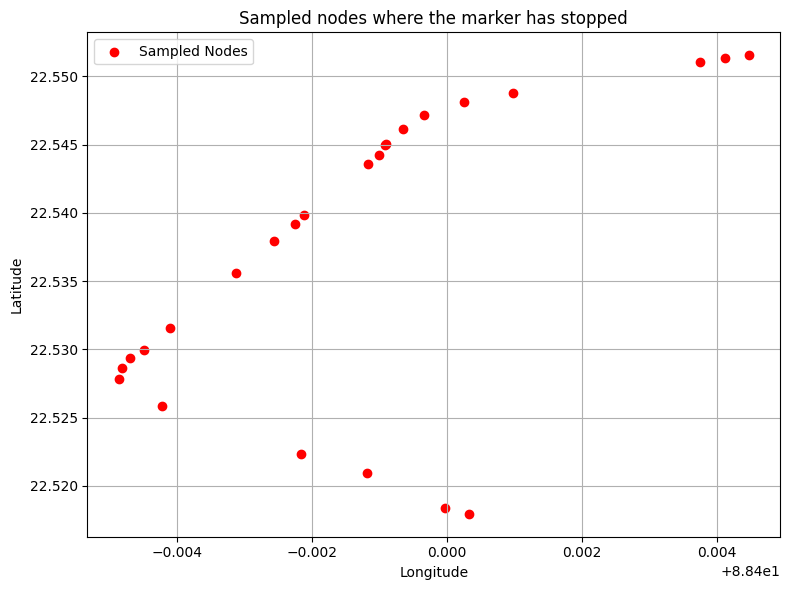

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read GPS data from the TXT file into a DataFrame
data = []
with open('tracking_data.txt', 'r') as file:
    for line in file:
        if line.startswith('Type: GPS'):
            line = line.strip().split(', ')
            gps = {}
            for item in line:
                key, value = item.split(': ')
                if key.strip() in ['Latitude', 'Longitude']:
                    gps[key.strip()] = float(value.strip())
            data.append(gps)

# Create a DataFrame from the GPS data
df = pd.DataFrame(data)

# Limit the number of points to plot (e.g., 1000 points)
max_points_to_plot = 25

if len(df) > max_points_to_plot:
    # Randomly sample points if the number of points is greater than the limit
    df_sampled = df.sample(n=max_points_to_plot, random_state=42)
else:
    df_sampled = df

# Plotting the sampled locations where the GPS marker has stopped
if not df_sampled.empty:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_sampled['Longitude'], df_sampled['Latitude'], color='red', label='Sampled Nodes')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Sampled nodes where the marker has stopped')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No GPS data available.")


In [ ]:
pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 35.1 MB/s eta 0:00:00


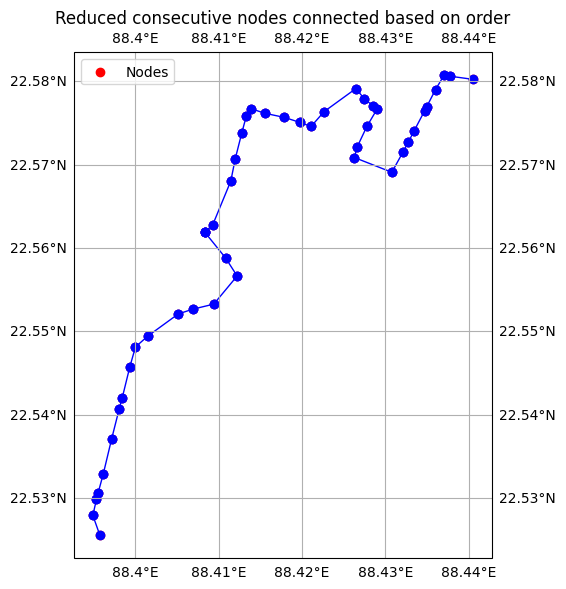

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Read GPS data from the TXT file into a DataFrame
data = []
with open('tracking_data (4).txt', 'r') as file:
    for line in file:
        if line.startswith('Type: GPS'):
            line = line.strip().split(', ')
            gps = {}
            for item in line:
                key, value = item.split(': ')
                if key.strip() in ['Latitude', 'Longitude']:
                    gps[key.strip()] = float(value.strip())
            data.append(gps)

# Create a DataFrame from the GPS data
df = pd.DataFrame(data)

# Limit the number of consecutive nodes to plot and connect
max_consecutive_nodes = 50

# Plotting the nodes and connecting a subset based on order
if not df.empty:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # Reduce the number of consecutive nodes
    df_reduced = df.iloc[::max_consecutive_nodes]

    # Plot nodes
    ax.scatter(df_reduced['Longitude'], df_reduced['Latitude'], color='red', label='Nodes')

    # Connect reduced nodes based on their order
    for i in range(len(df_reduced) - 1):
        ax.plot([df_reduced.iloc[i]['Longitude'], df_reduced.iloc[i + 1]['Longitude']],
                [df_reduced.iloc[i]['Latitude'], df_reduced.iloc[i + 1]['Latitude']],
                color='blue', linewidth=1, marker='o')

    # Additional plot settings
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Reduced consecutive nodes connected based on order')

    # Show legend and grid
    ax.legend()
    ax.gridlines(draw_labels=True)

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("No GPS data available.")


In [ ]:
import pandas as pd
import folium

# Read GPS data from the TXT file into a DataFrame
data = []
with open('tracking_data (5).txt', 'r') as file:
    for line in file:
        if line.startswith('Type: GPS'):
            line = line.strip().split(', ')
            gps = {}
            for item in line:
                key, value = item.split(': ')
                if key.strip() in ['Latitude', 'Longitude']:
                    gps[key.strip()] = float(value.strip())
            data.append(gps)

# Create a DataFrame from the GPS data
df = pd.DataFrame(data)

# Limit the number of consecutive nodes to plot and connect
max_consecutive_nodes = 50

# Reduce the number of consecutive nodes
df_reduced = df.iloc[::max_consecutive_nodes]

# Create a Folium map centered at a specific location
map_center = [df_reduced['Latitude'].mean(), df_reduced['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=15)

# Plotting nodes on the Folium map
for index, row in df_reduced.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']], radius=3, color='red').add_to(m)

# Adding connections based on order as PolyLine to the Folium map
lines = []
for i in range(len(df_reduced) - 1):
    line = {
        'type': 'LineString',
        'coordinates': [
            [df_reduced.iloc[i]['Longitude'], df_reduced.iloc[i]['Latitude']],
            [df_reduced.iloc[i + 1]['Longitude'], df_reduced.iloc[i + 1]['Latitude']]
        ],
        'popup': f"Connection {i + 1}"
    }
    lines.append(line)

folium.features.GeoJson(data={
    'type': 'FeatureCollection',
    'features': lines
}).add_to(m)

# Save the map to an HTML file
m.save('graph_on_map.html')

# Display the map
m


In [ ]:
import pandas as pd
import folium
from datetime import datetime

# Read GPS data from the TXT file into a DataFrame
data = []
with open('tracking_data (4).txt', 'r') as file:
    for line in file:
        if line.startswith('Type: GPS'):
            line = line.strip().split(', ')
            gps = {}
            for item in line:
                key, value = item.split(': ')
                if key.strip() in ['Latitude', 'Longitude', 'Timestamp']:
                    if key.strip() == 'Timestamp':
                        timestamp_value = ' '.join(value.split(' ')[:6])  # Extract only the date and time
                        timestamp_value = ' '.join(timestamp_value.split(' ')[:-1])  # Remove timezone info
                        gps[key.strip()] = datetime.strptime(timestamp_value, '%a %b %d %Y %H:%M:%S')
                    else:
                        gps[key.strip()] = float(value.strip())
            data.append(gps)

# Create a DataFrame from the GPS data
df = pd.DataFrame(data)

# Calculate the time spent in each position
df['TimeSpent'] = df['Timestamp'].diff().fillna(pd.Timedelta(seconds=0))

# Normalize the time spent to a numeric range
max_time_spent = df['TimeSpent'].max().total_seconds()
df['TimeSpentNormalized'] = df['TimeSpent'].apply(lambda x: x.total_seconds() / max_time_spent)

# Reduce the number of nodes to be plotted
max_nodes_to_plot = 100
df_reduced = df.iloc[::len(df) // max_nodes_to_plot]

# Create a Folium map centered at the mean of Latitude and Longitude
map_center = [df_reduced['Latitude'].mean(), df_reduced['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=15)

# Plotting reduced nodes on the Folium map with color based on time spent
for index, row in df_reduced.iterrows():
    # Color the nodes based on the normalized time spent
    color_value = row['TimeSpentNormalized']
    color = f'hsl({120 * (1 - color_value)}, 100%, 50%)'  # Using HSL color representation
    folium.CircleMarker([row['Latitude'], row['Longitude']], radius=3, color=color).add_to(m)

# Connecting the reduced nodes
for i in range(len(df_reduced) - 1):
    points = [
        (df_reduced.iloc[i]['Latitude'], df_reduced.iloc[i]['Longitude']),
        (df_reduced.iloc[i + 1]['Latitude'], df_reduced.iloc[i + 1]['Longitude'])
    ]
    folium.PolyLine(points, color="blue", weight=2.5, opacity=1).add_to(m)

# Save the map to an HTML file
m.save('reduced_graph_on_map_colored.html')

# Display the map
m


In [ ]:
import pandas as pd
import folium
from datetime import datetime

# Read GPS data from the TXT file into a DataFrame
data = []
with open('tracking_data (4).txt', 'r') as file:
    for line in file:
        if line.startswith('Type: GPS'):
            line = line.strip().split(', ')
            gps = {}
            for item in line:
                key, value = item.split(': ')
                if key.strip() in ['Latitude', 'Longitude', 'Timestamp']:
                    if key.strip() == 'Timestamp':
                        timestamp_value = ' '.join(value.split(' ')[:6])  # Extract only the date and time
                        timestamp_value = ' '.join(timestamp_value.split(' ')[:-1])  # Remove timezone info
                        gps[key.strip()] = datetime.strptime(timestamp_value, '%a %b %d %Y %H:%M:%S')
                    else:
                        gps[key.strip()] = float(value.strip())
            data.append(gps)

# Create a DataFrame from the GPS data
df = pd.DataFrame(data)

# Calculate the time spent in each position
df['TimeSpent'] = df['Timestamp'].diff().fillna(pd.Timedelta(seconds=0))

# Normalize the time spent to a numeric range
max_time_spent = df['TimeSpent'].max().total_seconds()
df['TimeSpentNormalized'] = df['TimeSpent'].apply(lambda x: x.total_seconds() / max_time_spent)

# Reduce the number of nodes to be plotted
max_nodes_to_plot = 50
df_reduced = df.iloc[::len(df) // max_nodes_to_plot]

# Create a Folium map centered at the mean of Latitude and Longitude
map_center = [df_reduced['Latitude'].mean(), df_reduced['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=15)

# Plotting nodes on the Folium map with color based on time spent
for index, row in df_reduced.iterrows():
    # Color the nodes based on the normalized time spent
    color_value = row['TimeSpentNormalized']
    color = f'hsl({120 * (1 - color_value)}, 100%, 50%)'  # Using HSL color representation
    folium.CircleMarker([row['Latitude'], row['Longitude']], radius=3, color=color).add_to(m)

# Connecting the reduced nodes
for i in range(len(df_reduced) - 1):
    points = [
        (df_reduced.iloc[i]['Latitude'], df_reduced.iloc[i]['Longitude']),
        (df_reduced.iloc[i + 1]['Latitude'], df_reduced.iloc[i + 1]['Longitude'])
    ]
    color_value = df_reduced.iloc[i]['TimeSpentNormalized']
    color = f'hsl({120 * (1 - color_value)}, 100%, 50%)'  # Using HSL color representation
    folium.PolyLine(points, color=color, weight=2.5, opacity=1).add_to(m)

# Save the map to an HTML file
m.save('reduced_graph_on_map_colored.html')

# Display the map
m


In [ ]:
import pandas as pd
import folium
from datetime import datetime

# Read GPS data from the TXT file into a DataFrame
data = []
with open('tracking_data (4).txt', 'r') as file:
    for line in file:
        if line.startswith('Type: GPS'):
            line = line.strip().split(', ')
            gps = {}
            for item in line:
                key, value = item.split(': ')
                if key.strip() in ['Latitude', 'Longitude', 'Timestamp']:
                    if key.strip() == 'Timestamp':
                        timestamp_value = ' '.join(value.split(' ')[:6])  # Extract only the date and time
                        timestamp_value = ' '.join(timestamp_value.split(' ')[:-1])  # Remove timezone info
                        gps[key.strip()] = datetime.strptime(timestamp_value, '%a %b %d %Y %H:%M:%S')
                    else:
                        gps[key.strip()] = float(value.strip())
            data.append(gps)

# Create a DataFrame from the GPS data
df = pd.DataFrame(data)

# Calculate the time spent in each position
df['TimeSpent'] = df['Timestamp'].diff().fillna(pd.Timedelta(seconds=0))

# Normalize the time spent to a numeric range
max_time_spent = df['TimeSpent'].max().total_seconds()
df['TimeSpentNormalized'] = df['TimeSpent'].apply(lambda x: x.total_seconds() / max_time_spent)

# Reduce the number of nodes to be plotted
max_nodes_to_plot = 1000
df_reduced = df.iloc[::len(df) // max_nodes_to_plot]

# Create a Folium map centered at the mean of Latitude and Longitude
map_center = [df_reduced['Latitude'].mean(), df_reduced['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=15)

# Plotting nodes on the Folium map with color based on time spent
for index, row in df_reduced.iterrows():
    if row['TimeSpent'].total_seconds() in [1, 30]:
        color = 'red'
    else:
        color_value = row['TimeSpentNormalized']
        color = f'hsl({120 * (1 - color_value)}, 100%, 50%)'  # Using HSL color representation
    folium.CircleMarker([row['Latitude'], row['Longitude']], radius=3, color=color).add_to(m)

# Connecting the reduced nodes
for i in range(len(df_reduced) - 1):
    points = [
        (df_reduced.iloc[i]['Latitude'], df_reduced.iloc[i]['Longitude']),
        (df_reduced.iloc[i + 1]['Latitude'], df_reduced.iloc[i + 1]['Longitude'])
    ]
    color_value = df_reduced.iloc[i]['TimeSpentNormalized']
    color = f'hsl({120 * (1 - color_value)}, 100%, 50%)'  # Using HSL color representation
    folium.PolyLine(points, color=color, weight=2.5, opacity=1).add_to(m)

# Save the map to an HTML file
m.save('reduced_graph_on_map_colored.html')

# Display the map
m


In [6]:
import pandas as pd
import folium
from datetime import datetime

# Read GPS data from the TXT file into a DataFrame
data = []
with open('tracking_data (5).txt', 'r') as file:
    for line in file:
        if line.startswith('Type: GPS'):
            line = line.strip().split(', ')
            gps = {}
            for item in line:
                key, value = item.split(': ')
                if key.strip() in ['Latitude', 'Longitude', 'Timestamp']:
                    if key.strip() == 'Timestamp':
                        timestamp_value = ' '.join(value.split(' ')[:6])  # Extract only the date and time
                        timestamp_value = ' '.join(timestamp_value.split(' ')[:-1])  # Remove timezone info
                        gps[key.strip()] = datetime.strptime(timestamp_value, '%a %b %d %Y %H:%M:%S')
                    else:
                        gps[key.strip()] = float(value.strip())
            data.append(gps)

# Create a DataFrame from the GPS data
df = pd.DataFrame(data)

# Calculate the time taken to travel between consecutive nodes
df['TimeTaken'] = df['Timestamp'].diff().fillna(pd.Timedelta(seconds=0))

# Normalize the time taken to a numeric range
max_time_taken = df['TimeTaken'].max().total_seconds()
df['TimeTakenNormalized'] = df['TimeTaken'].apply(lambda x: x.total_seconds() / max_time_taken)

# Reduce the number of nodes to be plotted
max_nodes_to_plot = 1000
df_reduced = df.iloc[::len(df) // max_nodes_to_plot]

# Create a Folium map centered at the mean of Latitude and Longitude
map_center = [df_reduced['Latitude'].mean(), df_reduced['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=15)

# Plotting nodes on the Folium map with color based on time taken
for i in range(len(df_reduced) - 1):
    points = [
        (df_reduced.iloc[i]['Latitude'], df_reduced.iloc[i]['Longitude']),
        (df_reduced.iloc[i + 1]['Latitude'], df_reduced.iloc[i + 1]['Longitude'])
    ]
    color_value = df_reduced.iloc[i]['TimeTakenNormalized']
    color = f'hsl({120 * (1 - color_value)}, 100%, 50%)'  # Using HSL color representation
    folium.PolyLine(points, color=color, weight=2.5, opacity=1).add_to(m)

# Save the map to an HTML file
m.save('track_colored_by_time_taken.html')

# Display the map
m


In [18]:
import pandas as pd
import folium
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from google.colab import files

# Read GPS data from the TXT file into a DataFrame
data = []
with open('/content/tracking_data (5).txt', 'r') as file:
    for line in file:
        if line.startswith('Type: GPS'):
            line = line.strip().split(', ')
            gps = {}
            for item in line:
                key, value = item.split(': ')
                if key.strip() in ['Latitude', 'Longitude']:
                    gps[key.strip()] = float(value.strip())
                elif key.strip() == 'Timestamp':
                    gps[key.strip()] = value.strip()
            data.append(gps)

# Create a DataFrame from the GPS data
df = pd.DataFrame(data)

# Remove the timezone information
df['Timestamp'] = df['Timestamp'].str.split(' ').str[:-1].str.join(' ')

# Implement DBSCAN for clustering
dbscan = DBSCAN(eps=0.0001, min_samples=2).fit(df[['Latitude', 'Longitude']])
df['Cluster'] = dbscan.labels_

# Create a Folium map
map_plot = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=15)

# Add markers for each data point on the map
for index, row in df.iterrows():
    color = 'red' if row['Cluster'] == -1 else 'blue'
    folium.Marker([row['Latitude'], row['Longitude']], icon=folium.Icon(color=color)).add_to(map_plot)

# Save the map as an HTML file and download
map_plot.save("clustered_map.html")
files.download("clustered_map.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
import pandas as pd
import folium
from sklearn.cluster import DBSCAN
from google.colab import files

# Read GPS data from the TXT file into a DataFrame
data = []
with open('/content/tracking_data (5).txt', 'r') as file:
    for line in file:
        if line.startswith('Type: GPS'):
            line = line.strip().split(', ')
            gps = {}
            for item in line:
                key, value = item.split(': ')
                if key.strip() in ['Latitude', 'Longitude']:
                    gps[key.strip()] = float(value.strip())
                elif key.strip() == 'Timestamp':
                    gps[key.strip()] = value.strip()
            data.append(gps)

# Create a DataFrame from the GPS data
df = pd.DataFrame(data)

# Remove the timezone information
df['Timestamp'] = df['Timestamp'].str.split(' ').str[:-1].str.join(' ')

# Implement DBSCAN for clustering
dbscan = DBSCAN(eps=0.0001, min_samples=2).fit(df[['Latitude', 'Longitude']])
df['Cluster'] = dbscan.labels_

# Create a Folium map
map_plot = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=15)

# Add circle markers for each data point on the map
for index, row in df.iterrows():
    color = 'red' if row['Cluster'] == -1 else 'blue'
    folium.CircleMarker([row['Latitude'], row['Longitude']], radius=3, color=color, fill=True).add_to(map_plot)

# Save the map as an HTML file and download
map_plot.save("clustered_map_nodes.html")
files.download("clustered_map_nodes.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
import pandas as pd
import folium
from sklearn.cluster import DBSCAN
from google.colab import files

# Read GPS data from the TXT file into a DataFrame
data = []
with open('/content/tracking_data (5).txt', 'r') as file:
    for line in file:
        if line.startswith('Type: GPS'):
            line = line.strip().split(', ')
            gps = {}
            for item in line:
                key, value = item.split(': ')
                if key.strip() in ['Latitude', 'Longitude']:
                    gps[key.strip()] = float(value.strip())
                elif key.strip() == 'Timestamp':
                    gps[key.strip()] = value.strip()
            data.append(gps)

# Create a DataFrame from the GPS data
df = pd.DataFrame(data)

# Remove the timezone information
df['Timestamp'] = df['Timestamp'].str.split(' ').str[:-1].str.join(' ')

# Implement DBSCAN for clustering
dbscan = DBSCAN(eps=0.0001, min_samples=2).fit(df[['Latitude', 'Longitude']])
df['Cluster'] = dbscan.labels_

# Define the number of nodes to plot
num_nodes_to_plot = 100  # Change this value to control the number of nodes to visualize

# Slice the DataFrame to include only the specified number of nodes
df_subset = df.head(num_nodes_to_plot)

# Create a Folium map
map_plot = folium.Map(location=[df_subset['Latitude'].mean(), df_subset['Longitude'].mean()], zoom_start=15)

# Add circle markers for each data point on the map
for index, row in df_subset.iterrows():
    color = 'red' if row['Cluster'] == -1 else 'blue'
    folium.CircleMarker([row['Latitude'], row['Longitude']], radius=3, color=color, fill=True).add_to(map_plot)

# Save the map as an HTML file and download
map_plot.save("clustered_map_nodes.html")
files.download("clustered_map_nodes.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
import pandas as pd
import folium
from sklearn.cluster import DBSCAN
from google.colab import files

# Read GPS data from the TXT file into a DataFrame
data = []
with open('/content/tracking_data (5).txt', 'r') as file:
    for line in file:
        if line.startswith('Type: GPS'):
            line = line.strip().split(', ')
            gps = {}
            for item in line:
                key, value = item.split(': ')
                if key.strip() in ['Latitude', 'Longitude']:
                    gps[key.strip()] = float(value.strip())
                elif key.strip() == 'Timestamp':
                    gps[key.strip()] = value.strip()
            data.append(gps)

# Create a DataFrame from the GPS data
df = pd.DataFrame(data)

# Remove the timezone information
df['Timestamp'] = df['Timestamp'].str.split(' ').str[:-1].str.join(' ')

# Implement DBSCAN for clustering
dbscan = DBSCAN(eps=0.0001, min_samples=2).fit(df[['Latitude', 'Longitude']])
df['Cluster'] = dbscan.labels_

# Create a Folium map
map_plot = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=15)

# Add circle markers for each data point on the map
for index, row in df.iterrows():
    color = 'red' if row['Cluster'] == -1 else 'green'
    folium.CircleMarker([row['Latitude'], row['Longitude']], radius=3, color=color, fill=True).add_to(map_plot)

# Save the map as an HTML file
map_html_file = "/content/clustered_map_nodes.html"
map_plot.save(map_html_file)

# Download the HTML file
files.download(map_html_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
import pandas as pd
import folium
from sklearn.cluster import DBSCAN
from google.colab import files

# Read GPS data from the TXT file into a DataFrame
data = []
with open('/content/tracking_data (5).txt', 'r') as file:
    for line in file:
        if line.startswith('Type: GPS'):
            line = line.strip().split(', ')
            gps = {}
            for item in line:
                key, value = item.split(': ')
                if key.strip() in ['Latitude', 'Longitude']:
                    gps[key.strip()] = float(value.strip())
                elif key.strip() == 'Timestamp':
                    gps[key.strip()] = value.strip()
            data.append(gps)

# Create a DataFrame from the GPS data
df = pd.DataFrame(data)

# Remove the timezone information
df['Timestamp'] = df['Timestamp'].str.split(' ').str[:-1].str.join(' ')

# Implement DBSCAN for clustering
dbscan = DBSCAN(eps=0.0001, min_samples=2).fit(df[['Latitude', 'Longitude']])
df['Cluster'] = dbscan.labels_

# Filter only the green cluster (-1)
filtered_df = df[df['Cluster'] == -1]

# Create a Folium map
map_plot = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=15)

# Add circle markers for each data point on the map with different colors
for index, row in filtered_df.iterrows():
    if row['Cluster'] == -1:
        color = 'green'
    elif row['Cluster'] == 0:
        color = 'red'
    else:
        color = 'yellow'
    folium.CircleMarker([row['Latitude'], row['Longitude']], radius=3, color=color, fill=True).add_to(map_plot)

# Save the map as an HTML file
map_html_file = "/content/clustered_map_filtered.html"
map_plot.save(map_html_file)

# Download the HTML file
files.download(map_html_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
import pandas as pd
import folium
from sklearn.cluster import DBSCAN
from google.colab import files
import random

# Read GPS data from the TXT file into a DataFrame
data = []
with open('/content/tracking_data (5).txt', 'r') as file:
    for line in file:
        if line.startswith('Type: GPS'):
            line = line.strip().split(', ')
            gps = {}
            for item in line:
                key, value = item.split(': ')
                if key.strip() in ['Latitude', 'Longitude']:
                    gps[key.strip()] = float(value.strip())
                elif key.strip() == 'Timestamp':
                    gps[key.strip()] = value.strip()
            data.append(gps)

# Create a DataFrame from the GPS data
df = pd.DataFrame(data)

# Remove the timezone information
df['Timestamp'] = df['Timestamp'].str.split(' ').str[:-1].str.join(' ')

# Implement DBSCAN for clustering
dbscan = DBSCAN(eps=0.0001, min_samples=2).fit(df[['Latitude', 'Longitude']])
df['Cluster'] = dbscan.labels_

# Filter only the green cluster (-1)
filtered_df = df[df['Cluster'] == -1]

# Create a Folium map
map_plot = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=15)

# Randomly select a subset of green markers to plot
sampled_indices = random.sample(list(filtered_df.index), k=20)
for index, row in df.iterrows():
    if row['Cluster'] == -1 and index in sampled_indices:
        color = 'green'
        folium.CircleMarker([row['Latitude'], row['Longitude']], radius=3, color=color, fill=True).add_to(map_plot)
    elif row['Cluster'] == -1:
        color = 'yellow'
        folium.CircleMarker([row['Latitude'], row['Longitude']], radius=3, color=color, fill=True).add_to(map_plot)
    else:
        color = 'red'
        folium.CircleMarker([row['Latitude'], row['Longitude']], radius=3, color=color, fill=True).add_to(map_plot)

# Save the map as an HTML file
map_html_file = "/content/clustered_map_filtered_yellow_green.html"
map_plot.save(map_html_file)

# Download the HTML file
files.download(map_html_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>